In [63]:
import os
from collections import OrderedDict, namedtuple

import numpy as np
import pandas as pd

import astropy.table
from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt

In [55]:
import wuvars.analysis.match
from importlib import reload
reload(wuvars)
reload(wuvars.analysis.match)
from wuvars.analysis.match import TableMatcher


In [56]:
# This is all setup.

# we'll prototype what goes here in a jupyter notebook.
# I'm mostly thinking it'll be NGC 1333 as an example.

aux_path = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/NGC1333"

filepath_table4 = os.path.join(aux_path, "Scholz_2012ApJ_744_6S_table4.fit")
table4 = astropy.table.Table.read(filepath_table4)
coords_table4 = SkyCoord(ra=table4["RAJ2000"], dec=table4["DEJ2000"])
table4_tc = Table_and_coord(table4, coords_table4)

filepath_table2 = os.path.join(aux_path, "Scholz_2012ApJ_744_6S_table2.fit")
table2 = astropy.table.Table.read(filepath_table2)
coords_table2 = SkyCoord(ra=table2["RAJ2000"], dec=table2["DEJ2000"])
table2_tc = Table_and_coord(table2, coords_table2)

# print(table2_tc.coords)
# print(table4_tc.coords)

# filepath_table1 = os.path.join(aux_path, "Scholz_2012ApJ_756_24S_table1.fit")
# table1 = astropy.table.Table.read(filepath_table1)
# coords_table1 = SkyCoord(ra=table1["RAJ2000"], dec=table1["DEJ2000"])
# table1_tc = Table_and_coord(table1, coords_table1)

# print(table1_tc.coords)

# this is a sufficient basis for me to now build my thing around.

aux_tables = OrderedDict()
aux_tables["Scholz_12a_table2"] = table2_tc
aux_tables["Scholz_12a_table4"] = table4_tc
aux_tables["Scholz_12b_table1"] = table1_tc

# now we grab our spreadsheet
from wuvars.data import spreadsheet

wserv = 7  # for NGC 1333
spread = spreadsheet.load_wserv_v2(wserv)
spreadsheet_coordinates = SkyCoord(
    ra=spread["median"]["RA"].values * u.rad,
    dec=spread["median"]["DEC"].values * u.rad,
)

spread_tc = Table_and_coord(spread, spreadsheet_coordinates)

NameError: name 'Table_and_coord' is not defined

In [58]:
perseus_tablematch = TableMatcher(spread, aux_tables)
perseus_tablematch.match()

pt = perseus_tablematch

Non-matches to Scholz_12a_table2: 0
Non-matches to Scholz_12a_table4: 0
Non-matches to Scholz_12b_table1: 0


In [85]:
%run ../match.py

/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/match.py:149: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ra=spread["median"]["RA"].values * u.rad,


In [86]:
perseus_tablematch = TableMatcher(spread, aux_tables)
perseus_tablematch.match()


Non-matches to Scholz_12a_table2: 0
Non-matches to Scholz_12a_table4: 0
Non-matches to Scholz_12b_table1: 0


In [87]:
[x for x in perseus_tablematch.aux_tables['Scholz_12a_table2']['SpT']]

['M6.9',
 'M9.3',
 '~M9 ',
 'M7.1',
 'M8.3',
 'M7.0',
 'M7.4',
 '~L3 ',
 'M6.9',
 'M7.7']

In [88]:
[get_num_from_SpT(x.lstrip('~')) for x in perseus_tablematch.aux_tables['Scholz_12a_table2']['SpT']]

[6.9, 9.3, 9.0, 7.1, 8.3, 7.0, 7.4, 13.0, 6.9, 7.7]

In [89]:
"~M6".lstrip('~')

'M6'

In [90]:
scholz_SpT_n1 = [get_num_from_SpT(x.lstrip('~')) if x != '    ' else np.nan for x in perseus_tablematch.aux_tables['Scholz_12a_table4']['SpT1']]
print(scholz_SpT_n1)
[x for x in perseus_tablematch.aux_tables['Scholz_12a_table4']['SpT1']]

[9.2, 7.9, 7.9, 9.6, 7.6, 7.3, 6.5, 8.2, 8.0, nan, 9.2, nan, 7.5, 7.0, 7.5, 8.5, 7.5, 8.2, nan, nan, 7.4, 7.4, 6.4, 8.2, 7.0, 5.0, 6.0, 7.0, 5.0, 5.0, 7.3, 8.0, 7.0, 5.0, 5.0, 5.0, 8.0, 7.6, 7.6, 6.5, 6.0]


['M9.2',
 'M7.9',
 'M7.9',
 'M9.6',
 'M7.6',
 'M7.3',
 'M6.5',
 'M8.2',
 'M8  ',
 '    ',
 'M9.2',
 '    ',
 'M7.5',
 'M7  ',
 'M7.5',
 'M8.5',
 'M7.5',
 'M8.2',
 '    ',
 '    ',
 'M7.4',
 'M7.4',
 'M6.4',
 'M8.2',
 'M7.0',
 'M5  ',
 'M6  ',
 'M7  ',
 'M5  ',
 'M5.0',
 'M7.3',
 'M8.0',
 'M7.0',
 'M5.0',
 'M5.0',
 'M5.0',
 'M8.0',
 'M7.6',
 'M7.6',
 'M6.5',
 'M6  ']

In [49]:
%run ../spectral_type_to_number.py

In [50]:
get_num_from_SpT("~M6".lstrip('~'))

6.0

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:167: UserWarning: FixedFormatter should only be used together with FixedLocator


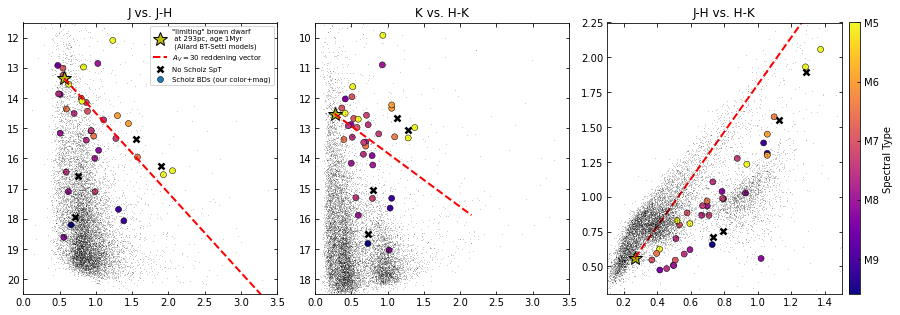

In [150]:
# Color-magnitude diagram?
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk
from wuvars.analysis.variability_selection import sq0

import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

w7m = spread['median']

fig, axes = plt.subplots(ncols=3, figsize=(15,5))

ax = axes[1]

# rieke & lebofsky 1985 reddening law
A_J = 0.282
A_K = 0.112
A_H = 0.175
E_HK = A_H - A_K # this is like a slope in color-mag space
E_JH = A_J - A_H # this is like a slope in color-mag space

wserv = 7
J_BDlimit = apparent_BD_mags_jhk[wserv][0]
H_BDlimit = apparent_BD_mags_jhk[wserv][1]
K_BDlimit = apparent_BD_mags_jhk[wserv][2]

j = w7m['JAPERMAG3']
h = w7m['HAPERMAG3']
k = w7m['KAPERMAG3']
hmk = h-k
jmh = j-h


q0 = sq0(spread, 80, 160)

axes[0].plot(
    [J_BDlimit-H_BDlimit],
    [J_BDlimit],
    'y*',
    ms=15,
    markeredgecolor='k',
    label='"limiting" brown dwarf\n at 293pc, age 1Myr\n (Allard BT-Settl models)',
    scalex=False,
    scaley=False
)

axes[0].plot(
    [J_BDlimit-H_BDlimit, (J_BDlimit-H_BDlimit) + E_JH*30],
    [J_BDlimit, J_BDlimit + A_J*30],
    'r--', lw=2,
    label='$A_V=30$ reddening vector',
    scalex=False,
    scaley=False
)
axes[0].plot(jmh[q0], j[q0], 'k,', alpha=0.2)
axes[0].set_xlim(0, 3.5)
axes[0].set_ylim(20.5, 11.5)

ax.plot(
    [H_BDlimit-K_BDlimit],
    [K_BDlimit],
    'y*',
    ms=15,
    markeredgecolor='k',
    label='"limiting" brown dwarf at 293pc, age 1Myr\n (Allard BT-Settl models)',
    scalex=False,
    scaley=False
)

ax.plot(
    [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*30],
    [K_BDlimit, K_BDlimit + A_K*30],
    'r--', lw=2,
    label='$A_V=30$ reddening vector',
    scalex=False,
    scaley=False
)
ax.plot(hmk[q0], k[q0], 'k,', alpha=0.2)
ax.set_xlim(0, 3.5)
ax.set_ylim(18.5, 9.5)

axes[2].plot(
    [H_BDlimit-K_BDlimit],
    [J_BDlimit-H_BDlimit],
    'y*',
    ms=15,
    markeredgecolor='k',
    label='"limiting" brown dwarf at 293pc, age 1Myr\n (Allard BT-Settl models)',
    scalex=False,
    scaley=False
)

axes[2].plot(
    [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*30],
    [J_BDlimit-H_BDlimit, (J_BDlimit-H_BDlimit) + E_JH*30],
    'r--', lw=2,
    label='$A_V=30$ reddening vector',
    scalex=False,
    scaley=False
)
axes[2].plot(hmk[q0], jmh[q0], 'k,', alpha=0.2)
axes[2].set_xlim(0.1, 1.5)
axes[2].set_ylim(0.3, 2.25)

us_J = perseus_tablematch.BD_spreadsheet['median']['JAPERMAG3']
us_H = perseus_tablematch.BD_spreadsheet['median']['HAPERMAG3']
us_K = perseus_tablematch.BD_spreadsheet['median']['KAPERMAG3']

# teff = np.copy(table['Teff1']) * 1.0
# teff[teff == 0] = np.nan

# sc = ax.scatter(us_H-us_K, us_K, c=teff, label="Scholz BDs (our color+mag)")
scholz_SpT_n1 = [get_num_from_SpT(x.lstrip('~')) if x != '    ' else np.nan for x in perseus_tablematch.aux_tables['Scholz_12a_table4']['SpT1']]
# scholz_SpT_n1 = [get_num_from_SpT(x.lstrip('~')) if x != '    ' else np.nan for x in perseus_tablematch.aux_tables['SpT1']]

scholz_matches_n1 = perseus_tablematch.aux_tables["Scholz_12a_table4"].matches['median']

sc = ax.scatter(
    scholz_matches_n1['HAPERMAG3'] - scholz_matches_n1['KAPERMAG3'], 
    scholz_matches_n1['KAPERMAG3'], 
    c=scholz_SpT_n1, 
    edgecolor='k',
    linewidths=0.5,
    cmap='plasma_r',
    label="Scholz BDs (our color+mag)")
ax.plot((scholz_matches_n1['HAPERMAG3'] - scholz_matches_n1['KAPERMAG3'])[np.isnan(scholz_SpT_n1)], 
        scholz_matches_n1['KAPERMAG3'][np.isnan(scholz_SpT_n1)], 
        'kx', 
        mew=2.5, label='No Scholz SpT')

sc2 = axes[0].scatter(
    scholz_matches_n1['JAPERMAG3'] - scholz_matches_n1['HAPERMAG3'], 
    scholz_matches_n1['JAPERMAG3'], 
    c=scholz_SpT_n1, 
    edgecolor='k',
    linewidths=0.5,
    cmap='plasma_r',
    label="Scholz BDs (our color+mag)")
axes[0].plot((scholz_matches_n1['JAPERMAG3'] - scholz_matches_n1['HAPERMAG3'])[np.isnan(scholz_SpT_n1)], 
        scholz_matches_n1['JAPERMAG3'][np.isnan(scholz_SpT_n1)], 
        'kx', 
        mew=2.5, label='No Scholz SpT')

sc3 = axes[2].scatter(
    scholz_matches_n1['HAPERMAG3'] - scholz_matches_n1['KAPERMAG3'], 
    scholz_matches_n1['JAPERMAG3'] - scholz_matches_n1['HAPERMAG3'], 
    c=scholz_SpT_n1, 
    edgecolor='k',
    linewidths=0.5,
    cmap='plasma_r',
    label="Scholz BDs (our color+mag)")
axes[2].plot(
    (scholz_matches_n1['HAPERMAG3'] - scholz_matches_n1['KAPERMAG3'])[np.isnan(scholz_SpT_n1)], 
    (scholz_matches_n1['JAPERMAG3'] - scholz_matches_n1['HAPERMAG3'])[np.isnan(scholz_SpT_n1)], 
    'kx', 
    mew=2.5, label='No Spectral Type')

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(sc, cax=cax) #, ax=axes)
cbar_ticks = cbar.get_ticks()
spt_array = np.array([get_SpT_from_num(int(x)) for x in cbar_ticks])
cbar.ax.set_yticklabels(spt_array)
cbar.ax.invert_yaxis()
cbar.set_label('Spectral Type')

# cbar.set_label('SpT')

# axes[0].set_xlabel("mean $J-H$ color")
# axes[0].set_ylabel("mean $J$ magnitude")
# axes[2].set_xlabel("mean $H-K$ color")
# axes[2].set_ylabel("mean $J-H$ color")
# ax.set_xlabel("mean $H-K$ color")
# ax.set_ylabel("mean $K$ magnitude")

axes[0].set_title("J vs. J-H")
axes[1].set_title("K vs. H-K")
axes[2].set_title("J-H vs. H-K")
axes[0].legend(fontsize=7)

plt.subplots_adjust(wspace=0.15)
# plt.tight_layout()

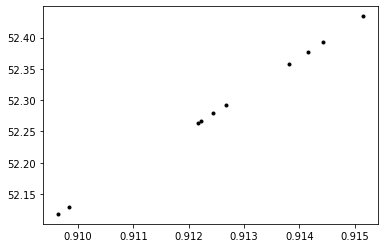

In [99]:
plt.plot(perseus_tablematch.aux_tables["Scholz_12a_table2"].matches['mean']['RA'], perseus_tablematch.aux_tables["Scholz_12a_table2"]['_RAJ2000'], 'k.')

In [98]:
perseus_tablematch.aux_tables["Scholz_12a_table2"]

_RAJ2000,_DEJ2000,SONYC,RAJ2000,DEJ2000,i_mag,z_mag,Jmag,Kmag,Av1,Av2,SpT,Teff,Names,Simbad,recno
deg,deg,,deg,deg,mag,mag,mag,mag,mag,mag,,K,,,
float64,float64,int16,float64,float64,float32,float32,float32,float32,int16,int16,bytes4,int16,bytes11,bytes6,int32
52.1183333,31.2742500,29,52.11833,31.27425,17.637,16.675,14.624,13.624,0,0,M6.9,3150,,Simbad,1
52.1295000,31.2844722,30,52.12950,31.28447,23.650,21.235,16.823,14.079,9,9,M9.3,2700,,Simbad,2
52.4339583,31.3299722,31,52.43396,31.32997,nan,nan,17.386,15.290,6,5,~M9,2300,Sp132,Simbad,3
52.2633750,31.4292222,32,52.26337,31.42922,nan,nan,15.798,13.832,4,4,M7.1,3200,"MBO89,Sp79",Simbad,4
52.2664583,31.3918889,33,52.26646,31.39189,nan,nan,17.143,14.932,7,5,M8.3,2500,"MBO116,Sp83",Simbad,5
52.2789167,31.4991944,34,52.27892,31.49919,20.839,19.225,16.541,14.774,4,4,M7.0,2950,Sp90,Simbad,6
52.2924167,31.4544444,35,52.29242,31.45444,18.988,17.711,15.547,14.127,2,2,M7.4,3050,"MBO94,Sp96",Simbad,7
52.3576667,31.2782778,36,52.35767,31.27828,23.392,21.432,18.530,17.070,2,0,~L3,2250,,Simbad,8
